# How to include biological information into hyperdimensional vectors and is this useful?

In [4]:
include("../src/HDC.jl")
include("../src/math.jl")
include("../src/experimental.jl")
using DataFrames
using CSV
using JLD

## Method 1: Via embeddings (ESM-2)

In [15]:
#Load embeddings from last hidden layer of ESM-2 model (21x1280)
aa_embeddings = DataFrame(CSV.File("../data/amino_acid_embeddings.csv"))
amino_acids_esm = aa_embeddings.protein_ID
aa_emb = Matrix(aa_embeddings[:, 2:end])
# Create HDVs
HDV_mat_bit = nested_arrays2mat([bithdv() for i in 1:size(aa_emb)[2]], true)

# Extend embeddings into hyperdimensional space
AA_bit_esm = permutedims(mat_scaler(aa_emb * HDV_mat_bit, 0, 1, 2) .|> round)

UndefVarError: UndefVarError: CSV not defined

## Baseline random HDVs

In [16]:
rand_bit = nested_arrays2mat([bithdv() for i in 1:20], true)

20×10000 BitMatrix:
 1  1  1  1  0  1  0  1  0  0  1  1  1  …  1  1  0  1  0  1  1  0  1  0  1  1
 1  0  1  1  1  0  0  1  0  0  0  1  1     0  0  0  1  0  1  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  1  0  0  0     1  0  1  0  0  1  0  0  0  1  1  1
 0  1  1  1  0  0  1  0  1  0  1  0  0     0  1  1  0  1  0  1  1  0  0  1  0
 0  0  1  1  1  1  0  1  1  1  1  0  1     0  0  0  1  0  0  0  0  0  0  1  1
 1  1  0  1  0  1  0  1  0  1  1  0  1  …  1  0  0  1  0  0  1  1  0  0  0  0
 1  1  0  0  0  1  1  1  0  1  1  0  1     0  1  0  0  1  0  1  1  0  0  0  1
 1  1  0  0  0  0  1  1  0  1  1  1  0     0  0  1  0  1  1  1  0  0  0  1  1
 0  1  1  0  0  0  1  0  1  0  1  0  1     0  1  1  1  0  0  1  0  1  1  0  1
 0  0  1  0  1  0  0  0  1  1  1  0  1     0  1  1  1  0  1  1  0  0  1  0  1
 0  1  1  1  1  0  0  1  0  0  0  1  0  …  1  0  0  1  1  0  1  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  1  0  0     0  0  0  0  0  0  0  1  1  0  0  1
 0  1  1  1  0  1  0  1  0  0  1  1  1     0

## PCA plots: is the physicochemical and biological information encoded into the HDVs?
### Binary HDVs

In [17]:
using MultivariateStats

PCA_rand_bit = fit(PCA, rand_bit; maxoutdim=2)
proj_rand_bit = projection(PCA_rand_bit)

PCA_ESM_bit = fit(PCA, AA_bit_esm; maxoutdim=2)
proj_ESM_bit = projection(PCA_ESM_bit)

groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'])

UndefVarError: UndefVarError: AA_bit_esm not defined

In [18]:
PCA_rand_bit

PCA(indim = 20, outdim = 2, principalratio = 0.1071956371086569)

Pattern matrix (unstandardized loadings):
──────────────────────────
           PC1         PC2
──────────────────────────
1   -0.131687    0.196199
2    0.0583511   0.0622853
3    0.0329936   0.0469904
4    0.109197    0.0110318
5   -0.0737779   0.0798834
6    0.124571    0.149209
7    0.216324   -0.116455
8   -0.0690626  -0.0689595
9   -0.132425    0.0759792
10   0.162375    0.208697
11  -0.132578    0.0904621
12   0.250713    0.090333
13   0.0752359  -0.0180812
14  -0.0973373  -0.107651
15  -0.09616     0.151214
16  -0.056054    0.0807879
17  -0.0870114  -0.0469331
18   0.0235404  -0.0362114
19   0.0410363   0.134452
20   0.0281163  -0.216756
──────────────────────────

Importance of components:
───────────────────────────────────────────────
                                 PC1        PC2
───────────────────────────────────────────────
SS Loadings (Eigenvalues)  0.268745   0.267219
Variance explained         0.053750

In [19]:
PCA_ESM_bit

UndefVarError: UndefVarError: PCA_ESM_bit not defined

In [20]:
proj_rand_bit

20×2 Matrix{Float64}:
  0.254023   -0.379546
 -0.112559   -0.12049
 -0.0636442  -0.0909026
 -0.210639   -0.0213409
  0.142317   -0.154534
 -0.240297   -0.288644
 -0.417286    0.22528
  0.133221    0.133402
  0.255447   -0.146981
 -0.313219   -0.403723
  0.255741   -0.174998
 -0.483623   -0.174748
 -0.145129    0.0349778
  0.187763    0.20825
  0.185492   -0.292522
  0.108128   -0.156284
  0.167844    0.0907917
 -0.0454091   0.0700506
 -0.0791587  -0.260097
 -0.054236    0.419312

#### Random binary HDVs

In [21]:
using Plots
AA_list  = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'O', 'U', 'B', 'J', 'Z']
key = collect(keys(groups))
indices = [[i for i in 1:length(AA_list) if AA_list[i] in groups[j]] for j in key]
AA_ind = [[i for i in AA_list if i in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_rand_bit[indices[i], 1], proj_rand_bit[indices[i], 2]), label=key[i], mc = colors[i])
    for j in 1:length(indices[i])
        annotate!((proj_rand_bit[indices[i][j], 1] + 0.02, proj_rand_bit[indices[i][j], 2], AA_ind[i][j]))
    end
end
savefig("../thesis/Fig/random_emb.png")
fig

UndefVarError: UndefVarError: groups not defined

#### ESM embedded HDVs

In [22]:
indices = [[i for i in 1:length(amino_acids_esm) if only(amino_acids_esm[i]) in groups[j]] for j in key]
AA_ind = [[only(i) for i in amino_acids_esm if only(i) in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_ESM_bit[indices[i], 1], proj_ESM_bit[indices[i], 2]), label=key[i], mc = colors[i])
    for j in 1:length(indices[i])
        annotate!((proj_ESM_bit[indices[i][j], 1] + 0.001, proj_ESM_bit[indices[i][j], 2], AA_ind[i][j]))
    end
end
scatter!(fig, (proj_ESM_bit[21, 1], proj_ESM_bit[21, 2]), label="X", mc = :black)
savefig("../thesis/Fig/esm_emb.png")
fig

UndefVarError: UndefVarError: key not defined

In [23]:
amino_acids_esm

UndefVarError: UndefVarError: amino_acids_esm not defined

# Human ref proteome embeddings

In [1]:
using JLD
dict4 = load("/home/mfat/Master-Thesis/data/aa_hdv_dict4.jld")["aa_hdv_dict"]
dictk = load("/home/mfat/Master-Thesis/data/aa_hdv_dictk.jld")["aa_hdv_dict"]

Dict{Any, Any} with 22 entries:
  'E' => [0.352386, 0.590637, 0.327424, 0.616646, 0.284433, 0.592283, 0.293631,…
  'X' => [0.208955, 0.283582, 0.492537, 0.402985, 0.656716, 0.298507, 0.701493,…
  'C' => [0.5521, 0.319237, 0.319367, 0.612369, 0.647701, 0.31536, 0.646171, 0.…
  'D' => [0.342342, 0.60075, 0.317189, 0.298431, 0.277138, 0.318302, 0.635705, …
  'A' => [0.355902, 0.589281, 0.329606, 0.609236, 0.630783, 0.334907, 0.620733,…
  'R' => [0.352595, 0.596882, 0.59478, 0.611755, 0.288304, 0.323442, 0.625463, …
  'G' => [0.347911, 0.328428, 0.597221, 0.307066, 0.63524, 0.326429, 0.299178, …
  'Q' => [0.353907, 0.590544, 0.323333, 0.312928, 0.636032, 0.324199, 0.628516,…
  'N' => [0.330291, 0.312455, 0.307171, 0.288853, 0.657438, 0.305346, 0.273399,…
  'P' => [0.36618, 0.583907, 0.583986, 0.590962, 0.297042, 0.572822, 0.608984, …
  'K' => [0.341694, 0.316981, 0.604161, 0.291194, 0.647932, 0.305101, 0.647397,…
  'M' => [0.578948, 0.312314, 0.606429, 0.293712, 0.648803, 0.31177, 0.6376, 

Kapot voor nu

In [2]:
dictr4 = load("/home/mfat/Master-Thesis/data/r_aa_hdv_dict4.jld")["aa_hdv_dict"]

Dict{Any, Any} with 26 entries:
  'E' => [0.4531, 0.479786, 0.389355, 0.399431, 0.402716, 0.342496, 0.347158, 0…
  'Z' => [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, N…
  'X' => [0.19403, 0.522388, 0.149254, 0.298507, 0.179104, 0.208955, 0.134328, …
  'C' => [0.263394, 0.489559, 0.389943, 0.330151, 0.322847, 0.322328, 0.407359,…
  'B' => [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, N…
  'D' => [0.255427, 0.511277, 0.327432, 0.379533, 0.402743, 0.338486, 0.325541,…
  'A' => [0.487158, 0.222754, 0.329737, 0.364833, 0.370072, 0.35585, 0.440092, …
  'R' => [0.266778, 0.237781, 0.38338, 0.389564, 0.330062, 0.343547, 0.397686, …
  'G' => [0.490832, 0.541498, 0.398807, 0.37203, 0.387052, 0.362473, 0.437945, …
  'Q' => [0.287649, 0.493464, 0.338453, 0.398166, 0.340673, 0.390684, 0.337421,…
  'N' => [0.470431, 0.245051, 0.325723, 0.341773, 0.309666, 0.326074, 0.388657,…
  'M' => [0.268089, 0.245113, 0.40188, 0.339548, 0.327058, 0.359865, 0.318913

In [37]:
dictr4

ThreadSafeDict{Any, Any} with 26 entries:
  'E' => [0.217568, 0.462975, 0.580484, 0.240863, 0.358887, 0.388078, 0.351651,…
  'Z' => [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, N…
  'X' => [0.0298507, 0.19403, 0.164179, 0.686567, 0.149254, 0.402985, 0.283582,…
  'B' => [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, N…
  'C' => [0.209764, 0.474322, 0.53916, 0.246806, 0.363178, 0.31531, 0.393469, 0…
  'D' => [0.510583, 0.262316, 0.573816, 0.253176, 0.345112, 0.325317, 0.397459,…
  'A' => [0.525745, 0.265132, 0.592958, 0.230409, 0.349437, 0.372381, 0.385857,…
  'R' => [0.203282, 0.267406, 0.181349, 0.234754, 0.36714, 0.327737, 0.325929, …
  'G' => [0.210062, 0.287956, 0.563694, 0.489053, 0.347072, 0.323069, 0.314389,…
  'N' => [0.524045, 0.26439, 0.187009, 0.252426, 0.344069, 0.387507, 0.378388, …
  'Q' => [0.530305, 0.266413, 0.178602, 0.503581, 0.364137, 0.37735, 0.377444, …
  'M' => [0.531904, 0.448422, 0.559699, 0.467948, 0.351873, 0.33582

In [38]:
mat4 = collect(values(dict4))
mat4 = nested_arrays2mat(mat4, true)

mat50 = collect(values(dictk))
mat50 = nested_arrays2mat(mat50, true)

matr4 = collect(values(dictr4))
matr4 = nested_arrays2mat(matr4, true)


AA_list4 = collect(keys(dict4))
AA_list50 = collect(keys(dictk))
AA_listr4 = collect(keys(dictr4))
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])

Dict{String, Vector{Char}} with 5 entries:
  "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F']
  "polar"     => ['S', 'T', 'Y', 'N', 'Q']
  "pos+"      => ['L', 'R', 'H']
  "neg-"      => ['D', 'E']
  "ambiguous" => ['U', 'X']

In [39]:
using MultivariateStats

PCA_tr4 = fit(PCA, mat4; maxoutdim=2)
PCA_tr50 = fit(PCA, mat50; maxoutdim=2)
PCA_trr4 = fit(PCA, matr4; maxoutdim=2)

ArgumentError: ArgumentError: matrix contains Infs or NaNs

In [40]:
PCA_tr4 = fit(PCA, mat4; maxoutdim=2)

PCA(indim = 22, outdim = 2, principalratio = 0.20874373050449502)

Pattern matrix (unstandardized loadings):
────────────────────────────
            PC1          PC2
────────────────────────────
1    0.0340219   -0.0535142
2    0.0686751    0.0400868
3    0.0182164   -0.0323296
4    0.0491864   -0.0204048
5   -0.0120143   -0.0511111
6    0.0388999    0.00346075
7    0.070001    -0.0419041
8    0.0677659    0.00371946
9    0.0625773    0.0519827
10   0.0798455   -0.0330346
11   0.0564447    0.0713107
12   0.0121978    0.0177812
13  -0.00364271   0.0722949
14   0.0137072    0.0787965
15   0.047268    -0.0186065
16   0.0670046   -0.0182353
17   0.0681696   -0.0322752
18   0.0452112   -0.0405153
19   0.00758924  -0.0066712
20   0.0453341    0.0282813
21   0.0216614    0.061358
22  -0.0343776   -0.0142983
────────────────────────────

Importance of components:
───────────────────────────────────────────────
                                 PC1        PC2
───────────────────────────────────

In [41]:
PCA_tr50 = fit(PCA, mat50; maxoutdim=2)

PCA(indim = 22, outdim = 2, principalratio = 0.20964585932349752)

Pattern matrix (unstandardized loadings):
────────────────────────────
            PC1          PC2
────────────────────────────
1    0.0337462   -0.0528073
2    0.042781     0.00227248
3    0.014668    -0.0375495
4    0.0364915   -0.0317672
5   -0.0195139   -0.0643319
6    0.0364856   -0.00106072
7    0.0766356   -0.0307495
8    0.066927    -0.00510404
9    0.0629037    0.0617347
10   0.0836329   -0.0247597
11   0.0587453    0.0716219
12   0.00106795   0.0120319
13  -0.00971746   0.0675031
14   0.00904653   0.0830463
15   0.0557034   -0.0181724
16   0.0733398    7.36789e-5
17   0.0652103   -0.0297473
18   0.0474563   -0.0372422
19  -0.0079552   -0.0081835
20   0.046229     0.0321628
21   0.0111487    0.0593225
22  -0.0441597   -0.0282788
────────────────────────────

Importance of components:
───────────────────────────────────────────────
                                 PC1        PC2
────────────────────────────────

In [42]:
proj_tr4 = projection(PCA_tr4)
proj_tr50 = projection(PCA_tr50)
proj_trr4 = projection(PCA_trr4)

UndefVarError: UndefVarError: PCA_trr4 not defined

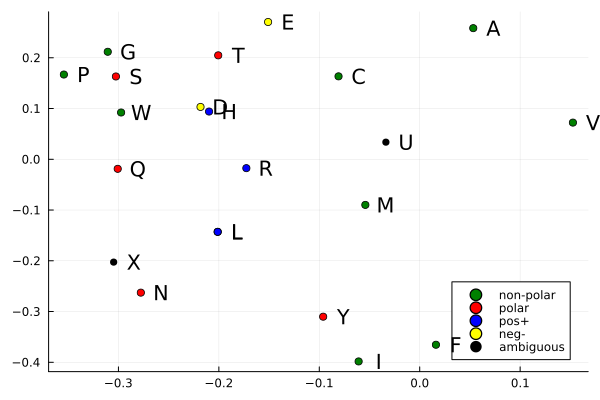

In [43]:
using Plots
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))
indices = [[i for i in 1:length(AA_list4) if AA_list4[i] in groups[j]] for j in key]
AA_ind = [[only(i) for i in AA_list4 if only(i) in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()

for i in 1:5
    scatter!(fig, (proj_tr4[indices[i], 1], proj_tr4[indices[i], 2]), label=key[i], mc = colors[i])
    for j in 1:length(indices[i])
        annotate!((proj_tr4[indices[i][j], 1] + 0.02, proj_tr4[indices[i][j], 2], AA_ind[i][j]))
    end
end
savefig("../thesis/Fig/4tr_emb.png")
fig


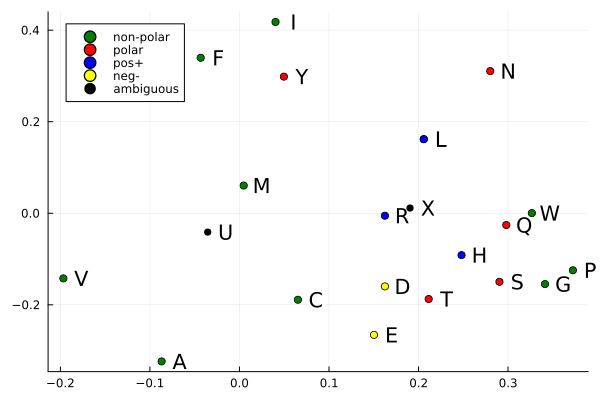

In [44]:
using Plots

key = collect(keys(groups))
indices = [[i for i in 1:length(AA_list50) if AA_list50[i] in groups[j]] for j in key]
AA_ind = [[only(i) for i in AA_list50 if only(i) in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()

for i in 1:5
    scatter!(fig, (proj_tr50[indices[i], 1], proj_tr50[indices[i], 2]), label=key[i], mc = colors[i])
    for j in 1:length(indices[i])
        annotate!((proj_tr50[indices[i][j], 1] + 0.02, proj_tr50[indices[i][j], 2], AA_ind[i][j]))
    end
end
savefig("../thesis/Fig/50tr_emb.png")

fig

In [45]:
using Plots
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))
indices = [[i for i in 1:length(AA_listr4) if AA_listr4[i] in groups[j]] for j in key]
AA_ind = [[only(i) for i in AA_listr4 if only(i) in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()

for i in 1:5
    scatter!(fig, (proj_trr4[indices[i], 1], proj_trr4[indices[i], 2]), label=key[i], mc = colors[i])
    for j in 1:length(indices[i])
        annotate!((proj_trr4[indices[i][j], 1] + 0.02, proj_trr4[indices[i][j], 2], AA_ind[i][j]))
    end
end
savefig("../thesis/Fig/r4tr_emb.png")
fig

UndefVarError: UndefVarError: proj_trr4 not defined